In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from dtaidistance import dtw, clustering
from sklearn.cluster import KMeans
import plotly.express as px

In [102]:
def display_all(df):
    pd.set_option('display.max_rows', None)
    display(df)
    pd.reset_option('display.max_rows')

pd.set_option('display.max_columns', None)

In [103]:
phyto_df = pd.read_csv('Coastal_rdatest.csv')

weights = phyto_df.iloc[-1][1:].to_list()
phyto_df = phyto_df.iloc[:-1]
phyto_df

,Unnamed: 0,RDA1,RDA2,RDA3,RDA4,RDA5,RDA6,RDA7,RDA8,RDA9,RDA10
0,Agl,-0.588670,-2.261870,1.240884,-1.479693,0.862295,-1.939606,0.201535,-0.664014,0.763997,-1.664129
1,Dbr,0.708728,-0.837214,2.012302,-3.043968,-0.574328,-1.627728,-1.505690,-0.263609,-2.628399,0.558945
2,Ezo,-1.031676,1.248915,0.863721,-1.652207,0.469698,1.941987,1.088365,0.447607,-0.341371,-0.119354
3,Gde,-2.738665,0.150496,1.022698,-0.152057,1.922337,0.677465,-0.632032,1.737365,-0.520757,0.057576
4,Oau,3.279829,-1.041213,-0.221010,-0.749560,2.511744,-0.441123,1.391465,0.525395,-0.043885,1.424346
...,...,...,...,...,...,...,...,...,...,...,...
74,Rte,-0.022632,0.067338,0.004503,-0.177607,-0.210495,0.149863,0.320448,0.097425,-0.111240,-0.053136
75,Fja,-0.541432,0.639639,-0.651437,-0.198980,-1.103528,-0.226536,-0.013935,0.941584,-1.354436,1.718999
76,Hak,-0.163779,0.218014,-0.167899,-0.064528,-0.337473,-0.067298,-0.326152,-0.126411,-0.204553,0.498815
77,Mhe,0.301047,-0.889935,-2.340858,-0.977303,1.208107,-1.639031,1.963505,1.759159,0.529109,0.345659


In [104]:
phyto_df.rename(columns={'Unnamed: 0': 'Species'}, inplace=True)
phyto_df

,Species,RDA1,RDA2,RDA3,RDA4,RDA5,RDA6,RDA7,RDA8,RDA9,RDA10
0,Agl,-0.588670,-2.261870,1.240884,-1.479693,0.862295,-1.939606,0.201535,-0.664014,0.763997,-1.664129
1,Dbr,0.708728,-0.837214,2.012302,-3.043968,-0.574328,-1.627728,-1.505690,-0.263609,-2.628399,0.558945
2,Ezo,-1.031676,1.248915,0.863721,-1.652207,0.469698,1.941987,1.088365,0.447607,-0.341371,-0.119354
3,Gde,-2.738665,0.150496,1.022698,-0.152057,1.922337,0.677465,-0.632032,1.737365,-0.520757,0.057576
4,Oau,3.279829,-1.041213,-0.221010,-0.749560,2.511744,-0.441123,1.391465,0.525395,-0.043885,1.424346
...,...,...,...,...,...,...,...,...,...,...,...
74,Rte,-0.022632,0.067338,0.004503,-0.177607,-0.210495,0.149863,0.320448,0.097425,-0.111240,-0.053136
75,Fja,-0.541432,0.639639,-0.651437,-0.198980,-1.103528,-0.226536,-0.013935,0.941584,-1.354436,1.718999
76,Hak,-0.163779,0.218014,-0.167899,-0.064528,-0.337473,-0.067298,-0.326152,-0.126411,-0.204553,0.498815
77,Mhe,0.301047,-0.889935,-2.340858,-0.977303,1.208107,-1.639031,1.963505,1.759159,0.529109,0.345659


In [105]:
phytoplankton_columns = phyto_df['Species'].to_list()

In [106]:
# rename_dict = {'Acn': 'Actinocyclus normanii', 'Aco': 'Actinocyclus octonarius', 'Agl': 'Asterionella glacialis', 'Ata': 'Alexandrium tamarense', 'Cau': 'Corymbellus aureus', 'Ccu': 'Chaetoceros curvisetus', 'Cda': 'Chaetoceros danicus', 'Cdeb': 'Chaetoceros debilis', 'Cden': 'Chaetoceros densus', 'Cdi': 'Chaetoceros didymus', 'Cei': 'Chaetoceros eibenii', 'Cfu': 'Ceratium fusus', 'Cgr': 'Coscinodiscus granii', 'Cha': 'Chattonella', 'Coc': 'Cochlodinium', 'Cra': 'Coscinodiscus radiatus', 'Csu': 'Chaetoceros subtilis', 'Cwa': 'Coscinodiscus wailesii', 'Dac': 'Dinophysis acuminata', 'Dat': 'Dinophysis acuta', 'Dbr': 'Ditylum brightwellii', 'Dip': 'Diploneis', 'Dle': 'Diplopsalis lenticula', 'Dno': 'Dinophysis norvegica', 'Dpu': 'Detonula pumila', 'Dro': 'Dinophysis rotundata', 'Dsp': 'Dictyocha speculum', 'Edu': 'Eunotogramma dubium', 'Etr': 'Ebria tripartita', 'Ezo': 'Eucampia zodiacus', 'Fja': 'Fibrocapsa japonica', 'Gde': 'Guinardia delicatula', 'Gfa': 'Gyrosigma fasciola', 'Gfl': 'Guinardia flaccida', 'Gsp': 'Gyrodinium spirale', 'Hak': 'Heterosigma akashiwo', 'Hta': 'Helicotheca tamesis', 'Kgl': 'Katodinium glaucum', 'Lan': 'Lauderia annulata', 'Lun': 'Lithodesmium undulatum', 'Mhe': 'Mediopyxis helysia', 'Mnu': 'Melosira nummuloides', 'Mpe': 'Mesoporos perforatus', 'Ndi': 'Navicula distans', 'Nsc': 'Noctiluca scintillans', 'Nsi': 'Nitzschia sigma', 'Oau': 'Odontella aurita', 'Omo': 'Odontella mobiliensis', 'Ore': 'Odontella regia', 'Orh': 'Odontella rhombus', 'Oro': 'Oblea rotunda', 'Osi': 'Odontella sinensis', 'Pac': 'Protoperidinium achromaticum', 'Pan': 'Pleurosigma angulatum', 'Pba': 'Prorocentrum balticum', 'Pbi': 'Protoperidinium bipes', 'Pbr': 'Protoperidinium brevipes', 'Pcl': 'Protoperidinium claudicans', 'Pco': 'Protoperidinium conicum', 'Pde': 'Protoperidinium depressum', 'Pha': 'Phaeocystis', 'Plo': 'Pyramimonas longicauda', 'Pmi': 'Prorocentrum micans', 'Pos': 'Podosira stelliger', 'Pse': 'Pseudopedinella', 'Pst': 'Protoperidinium steinii', 'Psu': 'Protoperidinium subinerme', 'Pte': 'Pterosperma', 'Ptr': 'Prorocentrum triestinum', 'Ram': 'Rhaphoneis amphiceros', 'Rse': 'Rhizosolenia setigera', 'Rst': 'Rhizosolenia styliformis', 'Rte': 'Roperia tesselata', 'Stu': 'Stephanopyxis turris', 'Tec': 'Thalassiosira eccentrica', 'Tle': 'Thalassiosira levanderi', 'Tni': 'Thalassionema nitzschioides', 'Tno': 'Thalassiosira nordenskioeldii', 'Tor': 'Torodinium robustum', 'Tro': 'Thalassiosira rotula'}

# df.rename(columns=rename_dict, inplace=True)

In [107]:
# phyto_df.iloc[:, 1:] = phyto_df.iloc[:, 1:] * weights
# this was based on misunderstanding of scaling 1 (which already accounts for different variance in axes)

In [108]:
# Initialize an empty list to hold the feature vectors
feature_vecs = []

# Loop through each phytoplankton type and calculate the mean values of abiotic factors
for _, row in phyto_df.iterrows():
    feature_vecs.append(row[1:].tolist())
#     feature_vecs.append(row.tolist())

# # Convert the feature vectors to a NumPy array
# feature_vecs = np.array(feature_vecs)
# display(feature_vecs)

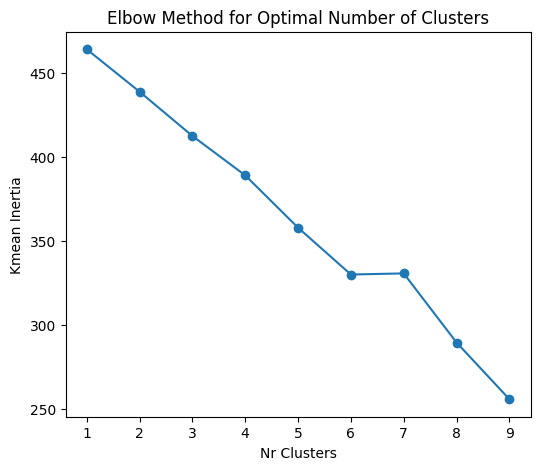

In [109]:
def plot_inertia(nr_clusters_limit):
    inertia_list = []

    for nr_clusters in range(1, nr_clusters_limit):
        kmeans = KMeans(n_clusters=nr_clusters, random_state=0)
        kmeans.fit(feature_vecs)
        inertia_list.append(kmeans.inertia_)

    fig = plt.figure(figsize=(6, 5))
    plt.plot(range(1, nr_clusters_limit), inertia_list, marker='o')
    plt.xlabel('Nr Clusters')
    plt.ylabel('Kmean Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

plot_inertia(10)

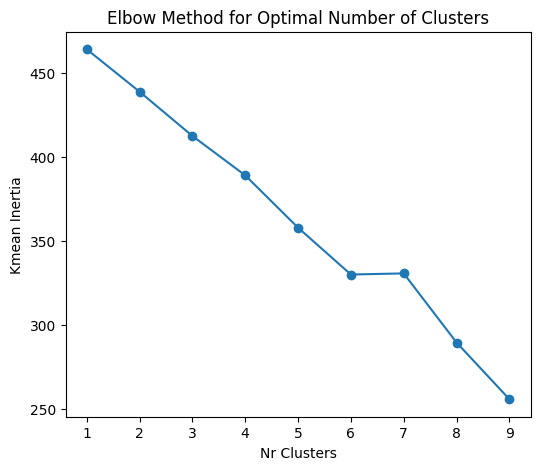

[4 5 0 4 1 1 4 4 4 1 4 4 2 4 1 1 4 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 4 1 1 1 1 1 1 1 1 4 1 4 1 1 0 1 1 4 1 1 1 3 1 1 1 1
 1 1 1 1 1]


,PCA Component 1,PCA Component 2,PCA Component 3,Cluster,Species
0,1.026346,-0.144812,-1.706053,4,Agl
1,-0.301921,0.953202,-0.835323,5,Dbr
2,-1.227305,-0.256006,0.256114,0,Ezo
3,0.422391,-2.291153,1.222461,4,Gde
4,2.084288,3.289991,-1.284812,1,Oau
...,...,...,...,...,...
74,-0.042158,0.103328,0.085529,1,Rte
75,0.148748,-0.413451,0.735211,1,Fja
76,-0.264833,-0.252053,-0.057525,1,Hak
77,2.426845,0.806073,-0.115492,1,Mhe


    PCA Component 1  PCA Component 2  PCA Component 3 Cluster Species
0          1.026346        -0.144812        -1.706053       4     Agl
1         -0.301921         0.953202        -0.835323       5     Dbr
2         -1.227305        -0.256006         0.256114       0     Ezo
3          0.422391        -2.291153         1.222461       4     Gde
4          2.084288         3.289991        -1.284812       1     Oau
..              ...              ...              ...     ...     ...
74        -0.042158         0.103328         0.085529       1     Rte
75         0.148748        -0.413451         0.735211       1     Fja
76        -0.264833        -0.252053        -0.057525       1     Hak
77         2.426845         0.806073        -0.115492       1     Mhe
78         0.003067         0.001705         0.006343       1     Dno

[79 rows x 5 columns]


Cluster 0:
['Ezo', 'Cdeb', 'Ptr', 'Cda']

Cluster 1:
['Oau', 'Omo', 'Rse', 'Dle', 'Etr', 'Gsp', 'Nsc', 'Pbi', 'Pbr', 'Pha', 'Stu', 'Kgl', 'Oro', 'Tor', 'Cdi', 'Cra', 'Ata', 'Cfu', 'Cgr', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip', 'Csu', 'Mnu', 'Pco', 'Cwa', 'Pba', 'Dac', 'Nsi', 'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Dsp', 'Cei', 'Ndi', 'Dro', 'Cha', 'Cau', 'Coc', 'Pte', 'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno']

Cluster 2:
['Tni']

Cluster 3:
['Edu']

Cluster 4:
['Agl', 'Gde', 'Orh', 'Osi', 'Ram', 'Tec', 'Tle', 'Tro', 'Gfl', 'Ore', 'Lan', 'Lun', 'Hta', 'Psu', 'Pac']

Cluster 5:
['Dbr']



In [110]:
plot_inertia(10)

n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(feature_vecs)
labels = kmeans.labels_
print(labels)

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(feature_vecs)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# colors = ['r', 'g', 'b', 'y', 'c', 'm']
# for i in range(n_clusters):
#     ax.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], reduced_features[labels == i, 2], 
#                color=colors[i], label=f'Cluster {i}')

# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
# ax.legend()
# plt.title('K-means Clustering')
# plt.show()



df = pd.DataFrame(reduced_features, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df['Cluster'] = labels.astype(str)

df['Species'] = phyto_df['Species']
display(df)
print(df)
fig = px.scatter_3d(df, x='PCA Component 1', y='PCA Component 2', z='PCA Component 3', color='Cluster', hover_name='Species')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()


phyto_clusters = []


for i in range(n_clusters):
    cluster_phytoplankton = [phytoplankton_columns[j] for j in range(len(labels)) if labels[j] == i]
    print(f"Cluster {i}:")
    phyto_clusters.append(cluster_phytoplankton)
    print(cluster_phytoplankton)
    print()

In [111]:
display(phyto_clusters)

clustered_dfs = {}
for i, group in enumerate(phyto_clusters):
    mask = normalized_phyto.index.isin(group)
    clustered_dfs[i] = normalized_phyto[mask]

clustered_dfs[2]

[['Ezo', 'Cdeb', 'Ptr', 'Cda'],
 ['Oau',
  'Omo',
  'Rse',
  'Dle',
  'Etr',
  'Gsp',
  'Nsc',
  'Pbi',
  'Pbr',
  'Pha',
  'Stu',
  'Kgl',
  'Oro',
  'Tor',
  'Cdi',
  'Cra',
  'Ata',
  'Cfu',
  'Cgr',
  'Pcl',
  'Pmi',
  'Pos',
  'Pse',
  'Cden',
  'Aco',
  'Dip',
  'Csu',
  'Mnu',
  'Pco',
  'Cwa',
  'Pba',
  'Dac',
  'Nsi',
  'Rst',
  'Pst',
  'Acn',
  'Tno',
  'Ccu',
  'Pan',
  'Gfa',
  'Dsp',
  'Cei',
  'Ndi',
  'Dro',
  'Cha',
  'Cau',
  'Coc',
  'Pte',
  'Mpe',
  'Pde',
  'Plo',
  'Dpu',
  'Rte',
  'Fja',
  'Hak',
  'Mhe',
  'Dno'],
 ['Tni'],
 ['Edu'],
 ['Agl',
  'Gde',
  'Orh',
  'Osi',
  'Ram',
  'Tec',
  'Tle',
  'Tro',
  'Gfl',
  'Ore',
  'Lan',
  'Lun',
  'Hta',
  'Psu',
  'Pac'],
 ['Dbr']]

NameError: name 'normalized_phyto' is not defined

Cluster 0: ['Omo', 'Orh', 'Osi', 'Ram', 'Tec', 'Tle', 'Tro', 'Dle', 'Etr', 'Nsc', 'Pbi', 'Pbr', 'Stu', 'Oro', 'Cdi', 'Cra', 'Ore', 'Ata', 'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip', 'Csu', 'Mnu', 'Pco', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi', 'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu', 'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']


Cluster 1: ['Pha']


Cluster 2: ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Rse', 'Tni', 'Gfl', 'Gsp', 'Kgl', 'Tor', 'Cdeb', 'Edu']

In [ ]:
unique_spec = {}
absent_spec = {}

total_species = set(phytoplankton_columns)

for i, df in clustered_dfs.items():
    current_species = set(df.index)

## FASTDTW

In [ ]:
import pandas as pd
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('../data/MERGED_DATA_INTERPOLATED2.xlsx')

In [ ]:
# phytoplankton_columns = ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh']  # subset

phytoplankton_columns=['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh', 'Osi', 'Ram', 'Rse',
       'Tec', 'Tle', 'Tni', 'Tro', 'Dle', 'Etr', 'Gfl', 'Gsp', 'Nsc', 'Pbi',
       'Pbr', 'Pha', 'Stu', 'Kgl', 'Oro', 'Tor', 'Cdi', 'Cra', 'Ore', 'Ata',
       'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip',
       'Csu', 'Mnu', 'Pco', 'Cdeb', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi',
       'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu',
       'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Edu',
       'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']

abiotic_factors = [
    'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
    'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]',
    'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]'
]

In [ ]:
# Extract time series data for each phytoplankton type
time_series_data = [data[phytoplankton].dropna().values for phytoplankton in phytoplankton_columns]

df_abiotic_factors = data[abiotic_factors].copy()
# df_abiotic_factors.fillna(df_abiotic_factors.mean(), inplace=True)

# Convert abiotic factors to tensor for DTW computation
abiotic_data_tensor = df_abiotic_factors.values

phytoplankton_similarity_matrix = np.zeros((len(time_series_data), len(time_series_data)))


In [ ]:
for i, series1 in enumerate(time_series_data):
    for j, series2 in enumerate(time_series_data):
        if i < j:
            distance, path = fastdtw(series1, series2)
            phytoplankton_similarity_matrix[i, j] = distance
            phytoplankton_similarity_matrix[j, i] = distance
        print(f"Pair ({i}, {j}) done - {int((i * len(time_series_data) + j) / ((len(time_series_data))**2) * 100)}%")


Pair (0, 0) done - 0%
Pair (0, 1) done - 0%
Pair (0, 2) done - 0%
Pair (0, 3) done - 0%
Pair (0, 4) done - 0%
Pair (0, 5) done - 0%
Pair (0, 6) done - 0%
Pair (0, 7) done - 0%
Pair (0, 8) done - 0%
Pair (0, 9) done - 0%
Pair (0, 10) done - 0%
Pair (0, 11) done - 0%
Pair (0, 12) done - 0%
Pair (0, 13) done - 0%
Pair (0, 14) done - 0%
Pair (0, 15) done - 0%
Pair (0, 16) done - 0%
Pair (0, 17) done - 0%
Pair (0, 18) done - 0%
Pair (0, 19) done - 0%
Pair (0, 20) done - 0%
Pair (0, 21) done - 0%
Pair (0, 22) done - 0%
Pair (0, 23) done - 0%
Pair (0, 24) done - 0%
Pair (0, 25) done - 0%
Pair (0, 26) done - 0%
Pair (0, 27) done - 0%
Pair (0, 28) done - 0%
Pair (0, 29) done - 0%
Pair (0, 30) done - 0%
Pair (0, 31) done - 0%
Pair (0, 32) done - 0%
Pair (0, 33) done - 0%
Pair (0, 34) done - 0%
Pair (0, 35) done - 0%
Pair (0, 36) done - 0%
Pair (0, 37) done - 0%
Pair (0, 38) done - 0%
Pair (0, 39) done - 0%
Pair (0, 40) done - 0%
Pair (0, 41) done - 0%
Pair (0, 42) done - 0%
Pair (0, 43) done - 0

/tmp/ipykernel_4474/1450431826.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(phytoplankton_similarity_matrix, method='single')


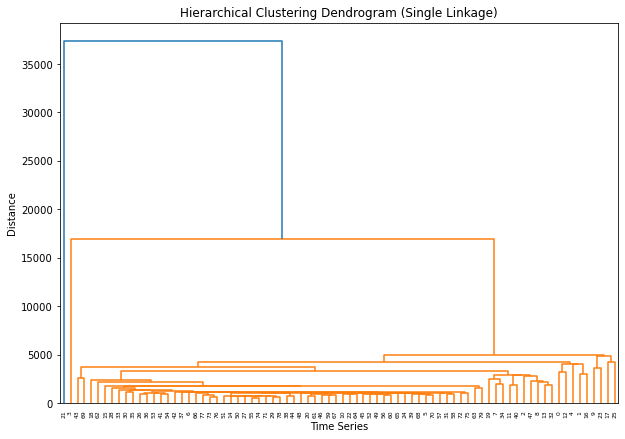

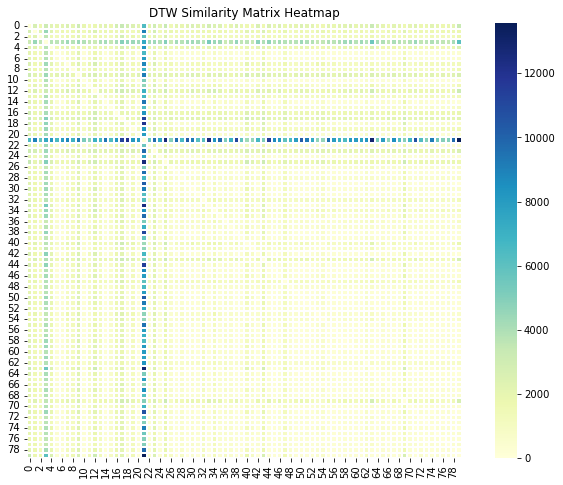

In [ ]:
# Perform hierarchical clustering using the distance matrix
# Single-linkage clustering
linked = linkage(phytoplankton_similarity_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=np.arange(len(time_series_data)))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Time Series')
plt.ylabel('Distance')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(phytoplankton_similarity_matrix, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
plt.title('DTW Similarity Matrix Heatmap')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 3)
clusters = kmeans_model.fit_predict(phytoplankton_similarity_matrix)
print(clusters)

cluster_lists = [[] for _ in range(3)]
for i, cluster in enumerate(clusters):
 #  print(i, phytoplankton_columns[i], cluster)
    cluster_lists[cluster].append(phytoplankton_columns[i])

for i, cluster in enumerate(cluster_lists):
    print(f"Cluster {i}: {cluster}")


[2 2 2 2 2 0 0 0 0 2 0 0 2 0 0 0 2 2 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0]
Cluster 0: ['Omo', 'Orh', 'Osi', 'Ram', 'Tec', 'Tle', 'Tro', 'Dle', 'Etr', 'Nsc', 'Pbi', 'Pbr', 'Stu', 'Oro', 'Cdi', 'Cra', 'Ore', 'Ata', 'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip', 'Csu', 'Mnu', 'Pco', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi', 'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu', 'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']
Cluster 1: ['Pha']
Cluster 2: ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Rse', 'Tni', 'Gfl', 'Gsp', 'Kgl', 'Tor', 'Cdeb', 'Edu']


/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
sil_score = silhouette_score(phytoplankton_similarity_matrix, clusters, metric="precomputed")
db_index = davies_bouldin_score(phytoplankton_similarity_matrix, clusters)
ch_score = calinski_harabasz_score(phytoplankton_similarity_matrix, clusters)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: 0.5391066061504406
Davies-Bouldin Index: 0.5190808127474345
Calinski-Harabasz Index: 151.59948076290186
